In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

def rk4(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i])
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2)
        d4 = derivee(v[:, i] + step * d3, t[i] + step)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

def Euler(start, end, step, v_ini, derivee):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((2, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        v[:, i + 1] = v[:, i] + step * derivee(v[:, i], t[i])

    # Argument de sortie
    return t, v

In [ ]:
x = np.linspace(-9, 9, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

In [ ]:
a = 2.
b = 2.
axes()
plt.contour(x, y,(x**2/a**2 + y**2/b**2), [1], colors='k')

a = .3
plt.contour(x, y, (y**2 - 4*a*x), [0], colors='k')

plt.axvline(-a)

plt.show()

In [ ]:
# EDO
def derivee_v(v, t):
    '''
        Soit v = (v0, v1)
        Loi vectorielle sur la vitesse : d(v0, v1)/dt = omega * (v1, -v0)
    '''
    # Initialisation de la dérivée
    dv = np.empty(v.shape)
    # Paramètre
    omega = 1 # s^-1
    
    # Dérivée de la vitesse
    dv[0] = omega * v[1]
    dv[1] = -omega * v[0]

    return dv

# Conditions initiales
v_ini = np.array([1.1, 0.0]) # m.s^-1

# Méthode d'Euler
t, v = Euler(0, 10, 0.001, v_ini, derivee_v)

# Représentation de la solution dans le plan (v_x, v_y)
plt.plot(v[0], v[1])
plt.xlabel('$v_x$ [m/s]')
plt.ylabel('$v_y$ [m/s]')
plt.axis("equal") # Pour avoir des axes isométriques
plt.grid()

In [ ]:
G = 6.65e-11 # m^3 kg^-1 s^-2
m1 = 10 # kg
m2 = 50 # kg

M = m1 + m2

In [ ]:
def derivee_r (r, t):
    dv = np.empty(r.shape)
    dv[0] = r[0]
    dv[1] = r[1]
    dv[2] = r[2]

    return dv

def derivee_v (v, t, r=np.array([0,0,0])):
    dv = np.empty(v.shape)

    den = ( r[0] ** 2 + r[1] ** 2 + r[2] ** 2) ** (3 / 2)
    
    dv[0] = - ( G * M * r[0] ) / den
    dv[1] = - ( G * M * r[1] ) / den
    dv[2] = - ( G * M * r[2] ) / den

    return dv

In [ ]:
t = np.linspace(0,100,1)

r = np.array([1,2,30])
v0 = np.array([1,1,1])

derivee_v(v0,t,r)

#plt.plot(t,v)
#plt.show()

#sol = odeint(derivee_v, y0, t, args=(r))
#t, v = Euler(0, 10, 0.001, v_ini, derivee_v)

In [ ]:
rk4(0, 10, .5, v0, derivee_v, ordre=3)

In [1]:
import matplotlib.pyplot as plt
from numpy import *
import math
from fractions import Fraction
import numpy as np
import numpy as np
from sympy import *
from sympy.interactive import printing

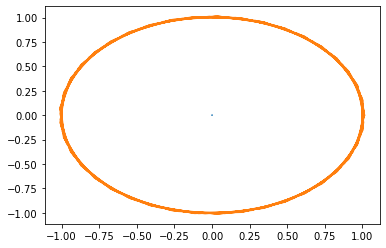

In [2]:

use_unicode = True
printing.init_printing(pretty_print=True,use_latex=True)
pi = math.pi


global m,M,G

M_S = 1.9891e30
tho = 24*3600*365
L = 1.5e11

M = 1.9891*10**30/M_S
m = 5.9722*10**24/M_S
G = 6.67*10**-11*M_S*tho**2/L**3

def Gravi(Position,vitesse):
	x_1 = Position[0]
	v_x_1 = vitesse[0]
	y_1 = Position[1]
	v_y_1 = vitesse[1]
	
	x_2 = Position[2]
	v_x_2 = vitesse[2]
	y_2 = Position[3]
	v_y_2 = vitesse[3]
	
	rx = x_1-x_2
	ry = y_1-y_2
	r = math.sqrt((rx)**2+(ry)**2)
	
	g = -G/r**3
	
	a_x_1 = m*rx*g
	a_y_1 = m*ry*g
	a_x_2 = -M*rx*g
	a_y_2 = -M*ry*g
	
	a = [a_x_1,a_y_1,a_x_2,a_y_2]
	v = [v_x_1,v_y_1,v_x_2,v_y_2]
	
	return a,v

x_1 = 0
y_1 = 0
x_2 = 152097701000/L
y_2 = 0

v_x_1 = 0
v_y_1 = 0
v_x_2 = 0
v_y_2 = sqrt(G*M/x_2)

y1 = [x_1,y_1,x_2,y_2]
d_y1 = [v_x_1,v_y_1,v_x_2,v_y_2]
y2 = []
d_y2 = []
y3 = []
d_y3 = []
y4 = []
d_y4 = []

for i in range(len(y1)):
	y2.append(0)
	d_y2.append(0)
	y3.append(0)
	d_y3.append(0)
	y4.append(0)
	d_y4.append(0)
	


dt = 0.05 #ne marche pas si dt >= 0.1
t = 0
temps = [0]
corps_1_x = [x_1]
corps_1_y = [y_1]
corps_2_x = [x_2]
corps_2_y = [y_2]

while t < 10 :
	
	p1 = Gravi(y1,d_y1)
	for i in range(len(y1)):
		y2[i] = y1[i] + dt/2*d_y1[i]
		d_y2[i] = d_y1[i] + dt/2*p1[0][i]
	
	p2 = Gravi(y2,d_y2)
	for i in range(len(y1)):
		y3[i] = y1[i] + dt/2*d_y1[i] + dt**2/4*p1[0][i]
		d_y3[i] = d_y1[i] + dt/2*p2[0][i]
	
	p3 = Gravi(y3,d_y3)
	for i in range(len(y1)):
		y4[i] = y1[i] +dt*d_y1[i] + dt**2/2*p2[0][i]
		d_y4[i] = d_y1[i] +dt*p3[0][i]
	
	p4 = Gravi(y4,d_y4)
	for i in range(len(y1)):
		y1[i] = y1[i] + dt*d_y1[i] +dt**2*(p1[0][i]+p2[0][i]+p3[0][i])/6
		d_y1[i] = d_y1[i] + dt*(p1[0][i]+2*p2[0][i]+2*p3[0][i]+p4[0][i])/6
	
	t = t + dt
	
	temps.append(t)
	
	corps_1_x.append(y1[0])
	corps_1_y.append(y1[1])
	corps_2_x.append(y1[2])
	corps_2_y.append(y1[3])

plt.plot(corps_1_x,corps_1_y,corps_2_x,corps_2_y)
plt.show()